### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('data/Whickham.txt')

In [21]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [23]:
# Map the outcome and smoker columns to numerical values for modeling
data['outcome'] = data['outcome'].map({'Alive': 1, 'Dead': 0})
data['smoker'] = data['smoker'].map({'Yes': 1, 'No': 0})

# Define the feature set and labels
X = data[['smoker', 'age']]
y = data['outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Create lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Loop over different depths and evaluate the model
for depth in range(1, 9):
    # Build the decision tree classifier with a specific max_depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracy on training and test data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

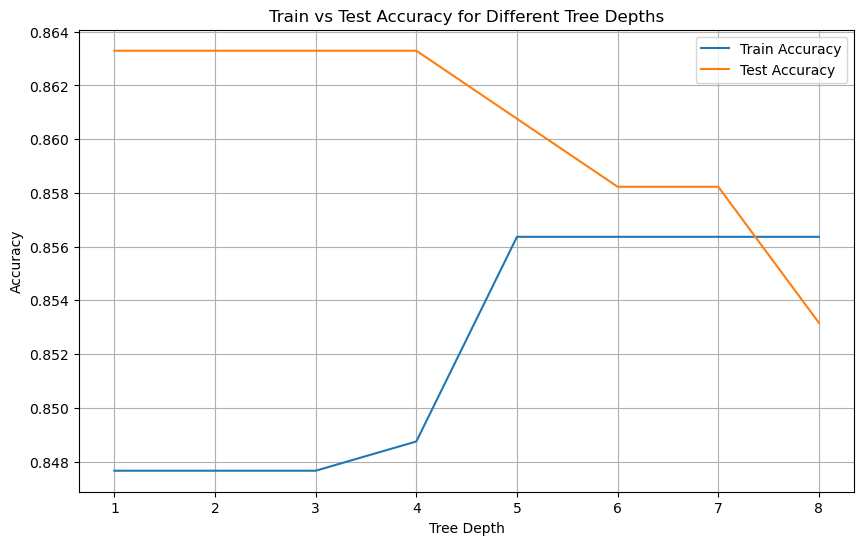

In [29]:
# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 9), test_accuracies, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Tree Depths')
plt.legend()
plt.grid(True)
plt.show()